![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 06 | Principal Component Analysis (PCA)

## Chapter Importance

We used just two variables out of the seven we had in the whole DataFrame.

We could have computed better cluster models as we give more information to the Machine Learning model. Nevertheless, it would have been **harder to plot seven variables with seven axis in a graph**.

Is there anything we can do compute a clustering model with more than two variables and later represent all the points along with their variables?

- Yes, everything is possible with data. As one of my teachers told me: "you can torture the data untill it gives you what you want" (sometimes it's unethical, so behave).

We'll develop the code to show you the need for **dimensionality reduction** techniques. Especifically, the Principal Component Analysis (PCA).

## [ ] Load the Data

Imagine for a second you are the president of the United States of America and you are considering to create campaigns to reduce **car accidents**.

You won't create 51 different TV campaigns for each one of the **States of USA** (rows). Instead, you will see which States behave in a similar manner to cluster them into 3 groups, based on the variation accross their features (columns).

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
...,...,...,...,...,...,...,...
WI,13.8,4.968,4.554,5.382,11.592,670.31,106.62
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04


> Check [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) to understand the measures of the following data.

## Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
scaler.fit(X=df_crashes)

StandardScaler()

In [6]:
import pandas as pd

In [10]:
df_scaled = pd.DataFrame(scaler.transform(df_crashes), columns=df_crashes.columns, index=df_crashes.index)

In [11]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


## k-Means Model in Python

### Import the Class

In [12]:
from sklearn.cluster import KMeans

### Instantiate the Class

In [13]:
model_km = KMeans(n_clusters=3)

### Fit the Model

In [14]:
model_km.fit(X=df_scaled)

KMeans(n_clusters=3)

### Calculate Predictions

In [15]:
model_km.predict(X=df_scaled)

array([1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1], dtype=int32)

### Create a New DataFrame for the Predictions

In [16]:
df_pred = df_scaled.copy()

### Create a New Column for the Predictions

In [17]:
df_pred['pred_km'] = model_km.predict(X=df_scaled)

In [22]:
df_pred.pred_km = df_pred.pred_km.astype(str)

In [24]:
df_pred.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
pred_km            object
dtype: object

### Visualize the Model

In [25]:
import plotly.express as px

In [28]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


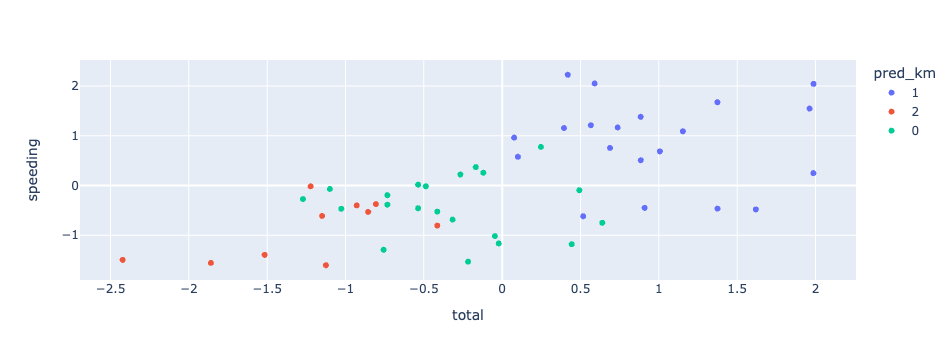

In [26]:
px.scatter(data_frame=df_pred, x='total', y='speeding', color='pred_km')

### Model Interpretation

## [ ] Grouping Variables with `PCA()`

In [29]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


![](src/pca.png)

### Transform Data to Components

`PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df_crashes`

In [30]:
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
...,...,...,...,...,...,...,...
WI,13.8,4.968,4.554,5.382,11.592,670.31,106.62
WY,17.4,7.308,5.568,14.094,15.660,791.14,122.04


2. Normalized Data `df_scaled`

In [31]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


3. Principal Components Data `df_pca` (now)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()

In [34]:
pca.fit(X=df_scaled)

PCA()

In [39]:
[i**2 for i in range(1, 8)]

[1, 4, 9, 16, 25, 36, 49]

In [42]:
cols_pca = [f'PC{i}' for i in range(1, 8)]

In [44]:
df_pca = pd.DataFrame(pca.transform(X=df_scaled), index=df_scaled.index, columns=cols_pca)

In [45]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
...,...,...,...,...,...,...,...
WI,-1.187447,-1.829767,0.522376,-0.486705,1.234004,0.044176,0.243181
WY,1.164326,-0.556064,0.710502,-0.351745,0.230845,-0.256171,0.002769


### Visualize Components & Clusters

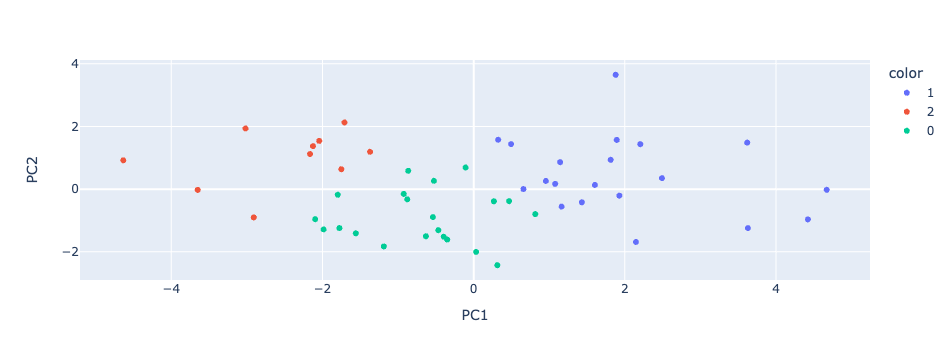

In [47]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred_km)

In [49]:
pca.explained_variance_ratio_

array([0.57342168, 0.22543042, 0.07865743, 0.05007557, 0.04011   ,
       0.02837999, 0.00392491])

In [50]:
pca.explained_variance_ratio_.cumsum()

array([0.57342168, 0.7988521 , 0.87750953, 0.9275851 , 0.9676951 ,
       0.99607509, 1.        ])

In [48]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


## [ ] Relationship between Original Variables & Components

### Loading Vectors

In [58]:
df_weight = pd.DataFrame(pca.components_.T, columns=cols_pca, index=df_scaled.columns)

In [60]:
df_weight.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


In [65]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
...,...,...,...,...,...,...,...
WI,-0.487627,-0.015114,-0.194372,-1.834714,-0.647305,-1.227190,-1.133459
WY,0.394425,1.156135,0.397884,0.116657,0.444019,-0.542754,-0.506406


In [66]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
...,...,...,...,...,...,...,...
WI,-1.187447,-1.829767,0.522376,-0.486705,1.234004,0.044176,0.243181
WY,1.164326,-0.556064,0.710502,-0.351745,0.230845,-0.256171,0.002769


In [64]:
pca.explained_variance_ratio_.cumsum()

array([0.57342168, 0.7988521 , 0.87750953, 0.9275851 , 0.9676951 ,
       0.99607509, 1.        ])

### Correlation Matrix

<AxesSubplot:>

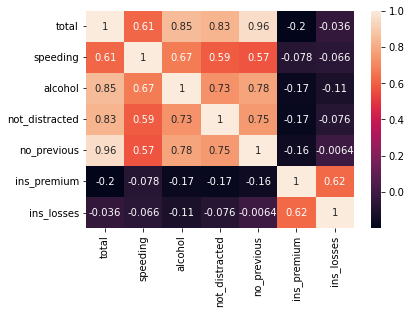

In [62]:
sns.heatmap(df_scaled.corr(), annot=True)

### [ ] Calculating One PCA Value

In [67]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
...,...,...,...,...,...,...,...
WI,-1.187447,-1.829767,0.522376,-0.486705,1.234004,0.044176,0.243181
WY,1.164326,-0.556064,0.710502,-0.351745,0.230845,-0.256171,0.002769


In [71]:
df_weight.loc[:, 'PC1']

total             0.479471
speeding          0.375347
alcohol           0.454376
not_distracted    0.438033
no_previous       0.457034
ins_premium      -0.130832
ins_losses       -0.069960
Name: PC1, dtype: float64

In [72]:
df_scaled.loc['AL', :] * df_weight.loc[:, 'PC1']

total             0.353584
speeding          0.438461
alcohol           0.199897
not_distracted    0.439041
no_previous       0.126915
ins_premium       0.075893
ins_losses       -0.030119
dtype: float64

In [74]:
(df_scaled.loc['AL', :] * df_weight.loc[:, 'PC2']).sum()

0.13344926968042947

In [75]:
(df_scaled.loc['AK', :] * df_weight.loc[:, 'PC2']).sum()

0.8582339894293285

## [ ] PCA & Cluster Interpretation

In [79]:
df_scaled.index

Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY'],
      dtype='object', name='abbrev')

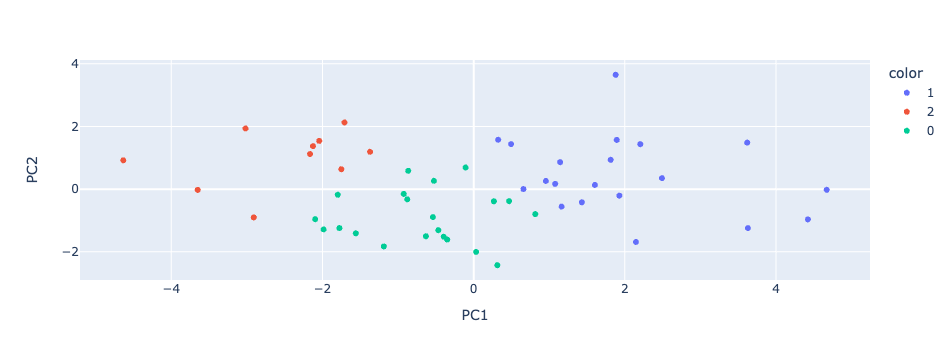

In [80]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred_km, hover_name=df_scaled.index)

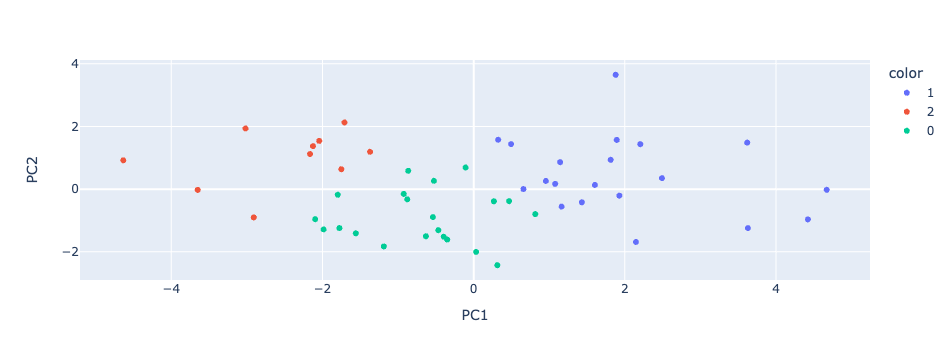

In [82]:
hover = '''
<b>%{customdata[0]}</b><br><br>
PC1: %{x}<br>
Total: %{customdata[1]}<br>
Alcohol: %{customdata[2]}<br><br>
PC2: %{y}<br>
Ins Losses: %{customdata[3]}<br>
Ins Premium: %{customdata[4]}
'''

fig = px.scatter(data_frame=df_pca, x='PC1', y='PC2',
                 color=df_pred.pred_km.astype(str),
                 hover_data=[df_pca.index, df_crashes.total, df_crashes.alcohol,
                             df_crashes.ins_losses, df_crashes.ins_premium])

fig.update_traces(hovertemplate = hover)

In [85]:
df_crashes.agg(['min','max'])

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
min,5.9,1.792,1.593,1.760,5.90,641.96,82.75
max,23.9,9.450,10.038,23.661,21.28,1301.52,194.78


In [83]:
df_weight.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


### Biplot

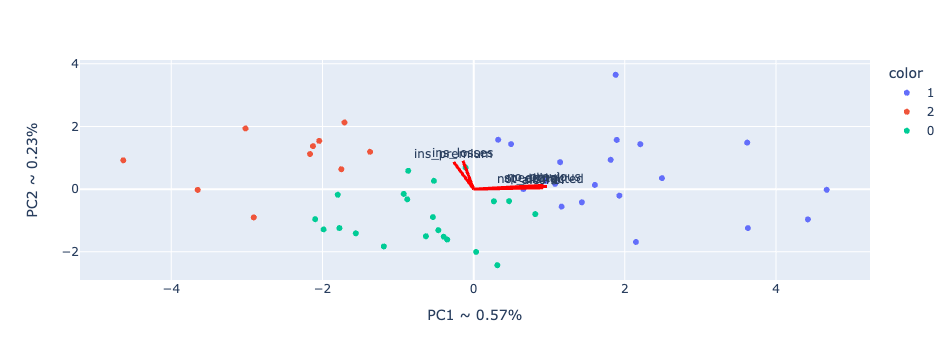

In [86]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
evr = pca.explained_variance_ratio_.round(2)

fig = px.scatter(df_pca, x='PC1', y='PC2',
                 color=model_km.labels_.astype(str),
                 hover_name=df_pca.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_scaled.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()


## Conclusion

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.